### Regresión Lineal
Primero importamos las dependencias

In [1]:
# Este método permite fraccionar el dataset
from sklearn.model_selection import train_test_split
# Es el paquete que contiene las clases de Regresión Lineal
from sklearn import linear_model
# Importamos el paquete donde se incluyen los datasets dumies
from sklearn import datasets

# Después de las principales vienen las librerías auxiliares
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Primero buscamos un dataset para practicar
wine_dataset = datasets.load_wine()

In [3]:
print(wine_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [4]:
print(wine_dataset['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [5]:
df = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)

In [6]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


In [9]:
# Inicializar el modelo
linear_reg = linear_model.LinearRegression()

In [22]:
# Valor independiente
data_x = df.total_phenols
# Valor que queremos obtener en base al valor independiente
data_y = df.flavanoids

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y)

In [23]:
# Hacemos el reformado de nuestros arrays
train_x = np.array(train_x).reshape(-1,1)
test_x = np.array(test_x).reshape(-1,1)

In [24]:
linear_reg.fit(train_x,train_y)

LinearRegression()

### Una vez entrenado el modelo procedemos a obtener los valores de la recta

In [25]:
print(f'Pendiente(m): {round(linear_reg.coef_[0],4)}')
print(f'Coeficiente de interseccion con el eje y (b): {round(linear_reg.intercept_)}')
print(f'y = {round(linear_reg.coef_[0],4)} x {round(linear_reg.intercept_)}')

Pendiente(m): 1.3954
Coeficiente de interseccion con el eje y (b): -1
y = 1.3954 x -1


### Recién podemos hacer predicciones

In [26]:
# Esto se ejecuta para cada nueva prediccion
y_predicted = linear_reg.predict(test_x)

In [27]:
print(y_predicted)

[2.40858491 2.1294992  1.69691635 2.21322492 2.82721348 2.74348776
 3.16211633 1.48760207 0.99920208 3.16211633 1.09688208 1.93413921
 2.04577349 0.85965922 1.78064207 3.02257347 3.02257347 2.81325919
 3.02257347 2.5202192  0.76197923 1.62714492 3.44120204 1.62714492
 2.74348776 2.46440205 2.95280205 2.39463063 3.72028775 1.20851636
 1.18060779 0.85965922 1.59923635 3.02257347 4.20868774 2.07368206
 3.23188776 3.44120204 1.52946493 1.76668778 2.74348776 1.90623063
 1.80855064 2.25508777 2.96675633]


In [28]:
test_y.to_numpy()

array([2.11, 2.04, 1.09, 2.69, 3.03, 2.69, 3.39, 0.58, 0.84, 3.69, 0.48,
       2.45, 0.92, 1.25, 2.  , 3.04, 3.25, 2.94, 2.79, 2.63, 1.76, 0.8 ,
       2.89, 1.58, 3.14, 2.65, 3.4 , 2.5 , 3.1 , 0.92, 1.84, 1.36, 1.6 ,
       3.  , 3.49, 0.6 , 3.29, 3.93, 0.76, 1.79, 2.98, 2.21, 2.24, 2.25,
       2.78])

In [29]:
print(f'Score: {round(linear_reg.score(test_x,test_y) * 100,2)}%')

Score: 71.34%


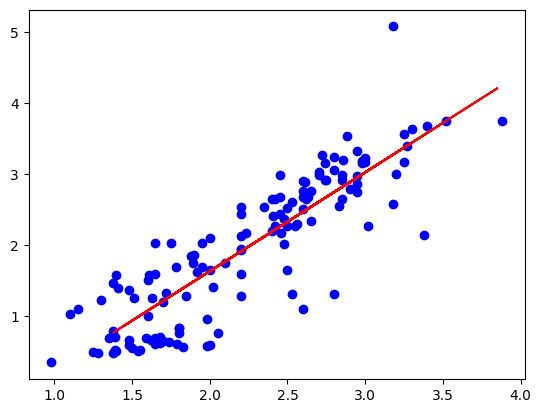

In [30]:
# Para graficar necesitamos lo siguiente
plt.scatter(train_x,train_y,c='b')
plt.plot(test_x, y_predicted,c='r')
plt.show()

In [31]:
corr = df.corr()
corr.style.background_gradient()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100
